In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
import pickle
import gzip
from tqdm import tqdm_notebook, tqdm

%matplotlib inline

# Reading dataset

In [2]:
with gzip.open('../cache/dataset.pkl.gz', 'rb') as f:
    X, y = pickle.load(f)

In [3]:
len(X), len(y)

(10986, 10986)

In [4]:
a = [x for x, y_ in zip(X, y) if y_ == 0]
b = [x for x, y_ in zip(X, y) if y_ == 1]
c = [x for x, y_ in zip(X, y) if y_ == 2]

In [5]:
c = [np.array(x) for x in c]

In [6]:
len(a), len(b), len(c)

(667, 278, 10041)

In [7]:
from IPython.display import Audio, display

In [8]:
wids = [Audio(a[i], rate=22050) for i in np.random.randint(0, len(a), 3)]

In [9]:
for w in wids:
    display(w)

In [10]:
wids = [Audio(b[i], rate=22050) for i in np.random.randint(0, len(b), 3)]

In [11]:
for w in wids:
    display(w)

In [12]:
wids = [Audio(c[i], rate=22050) for i in np.random.randint(0, len(c), 3)]

In [13]:
for w in wids:
    display(w)

# Plots

In [14]:
def plot_waves(sound_names, raw_sounds):
    i = 1
    l = len(raw_sounds)
    
    for n, f in zip(sound_names, raw_sounds):
        fig = plt.figure(figsize=(8, 5))
        librosa.display.waveplot(np.array(f), sr=22050)
        plt.title(n.title())
        i += 1
    plt.show()
    

def plot_specgram(sound_names, raw_sounds):
    i = 1
    l = len(raw_sounds)
    
    for n, f in zip(sound_names, raw_sounds):
        fig = plt.figure(figsize=(8, 5))
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.show()

    
def plot_log_power_specgram(sound_names, raw_sounds):
    i = 1
    l = len(raw_sounds)
    
    for n, f in zip(sound_names, raw_sounds):
        fig = plt.figure(figsize=(8, 5))
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D, x_axis='time', y_axis='log')
        plt.title(n.title())
        i += 1
    plt.show()

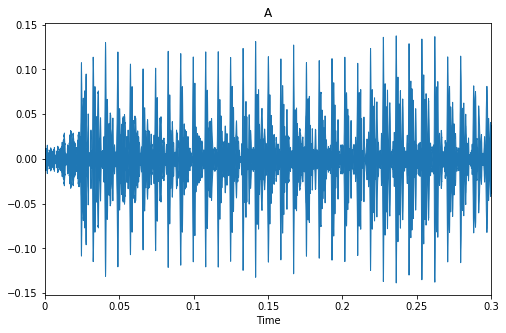

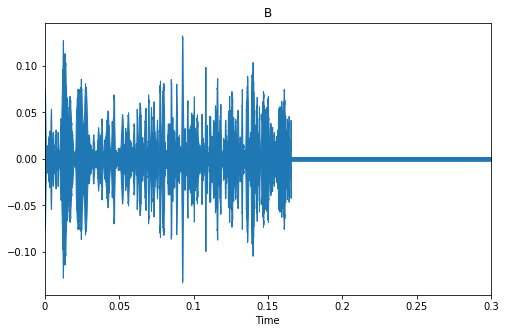

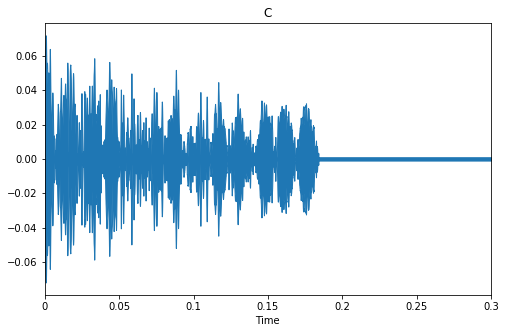

In [15]:
plot_waves(['a', 'b', 'c'], [a[0], b[0], c[0]])

/home/evgeny/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7221: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


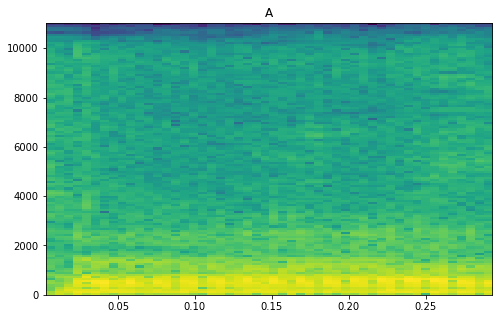

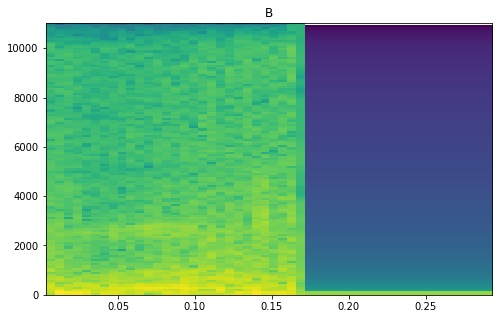

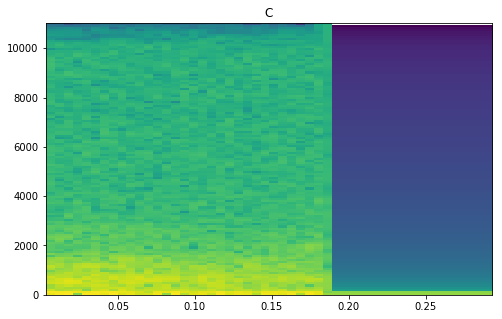

In [16]:
plot_specgram(['a', 'b', 'c'], [a[0], b[0], c[0]])

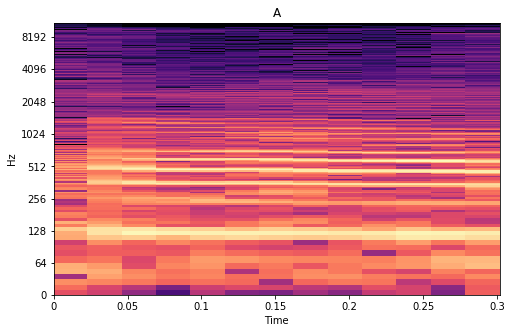

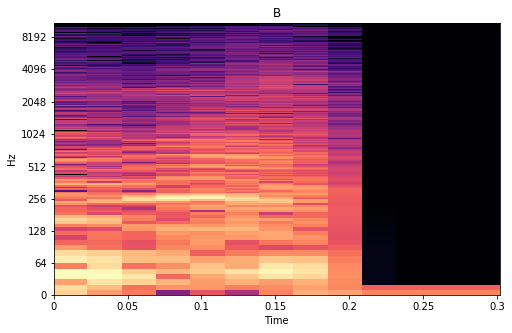

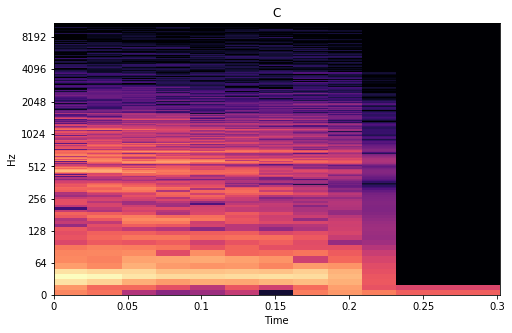

In [17]:
plot_log_power_specgram(['a', 'b', 'c'], [a[0], b[0], c[0]])

# New

In [18]:
from scipy.fftpack import fft
from scipy import signal

import IPython.display as ipd
import librosa.display
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [19]:
import tensorflow as tf
from tensorflow.contrib.framework.python.ops import audio_ops as contrib_audio

/home/evgeny/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6



In [20]:
sample_rate = 22050

In [21]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [22]:
samples = c[1241]

In [23]:
Audio(samples, rate=sample_rate)

In [24]:
%%timeit
freqs, times, spectrogram = log_specgram(samples, sample_rate)

712 µs ± 42.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

In [26]:
len(freqs)

221

Text(0.5,0,'Seconds')

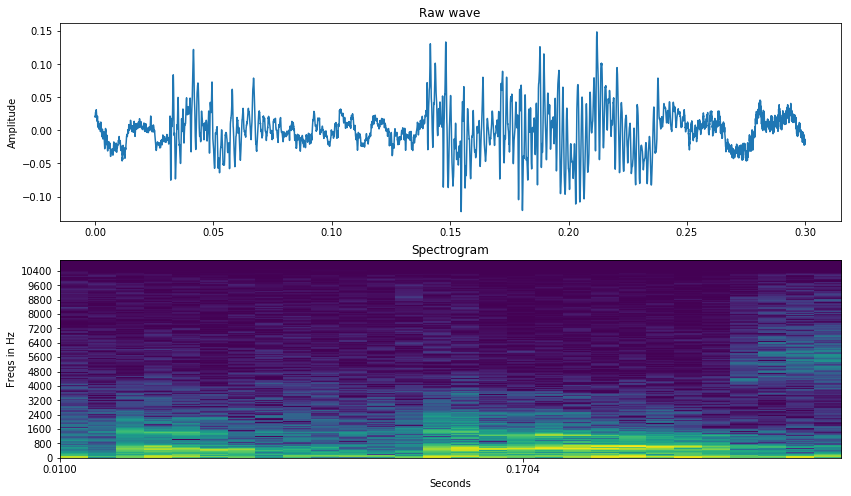

In [27]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, len(samples) / sample_rate, len(samples)), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

### Resample

https://librosa.github.io/librosa/generated/librosa.core.resample.html

In [28]:
new_sample_rate = 8000

In [29]:
%%time
samples_r = librosa.resample(samples, sample_rate, new_sample_rate)

CPU times: user 427 ms, sys: 11.7 ms, total: 438 ms
Wall time: 470 ms


In [30]:
freqs, times, spectrogram = log_specgram(samples_r, new_sample_rate)

In [31]:
len(freqs)

81

Text(0.5,0,'Seconds')

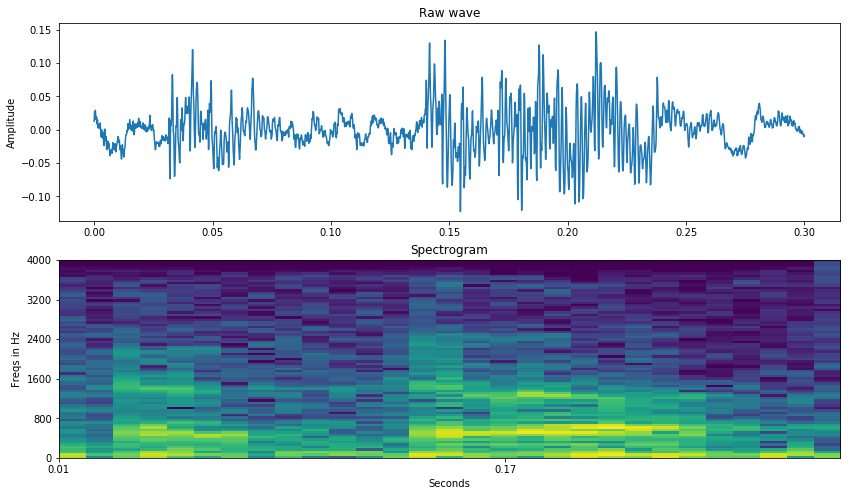

In [32]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, len(samples_r) / 8000, len(samples_r)), samples_r)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [33]:
spectrogram.shape

(29, 81)

### TF

In [34]:
sess = tf.InteractiveSession()

In [35]:
samples_tf = tf.constant(np.array([samples]).reshape(-1, 1), tf.float32)

In [36]:
samples_tf

<tf.Tensor 'Const:0' shape=(6615, 1) dtype=float32>

In [37]:
%time v = contrib_audio.audio_spectrogram(samples_tf, 30, 40, True)

CPU times: user 2.84 ms, sys: 0 ns, total: 2.84 ms
Wall time: 27.4 ms


In [38]:
v

<tf.Tensor 'AudioSpectrogram:0' shape=(1, 165, 17) dtype=float32>

In [39]:
spec = sess.run(v)[0]

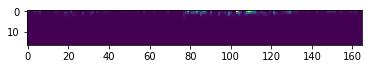

In [40]:
plt.imshow(spec.T)

## Mel

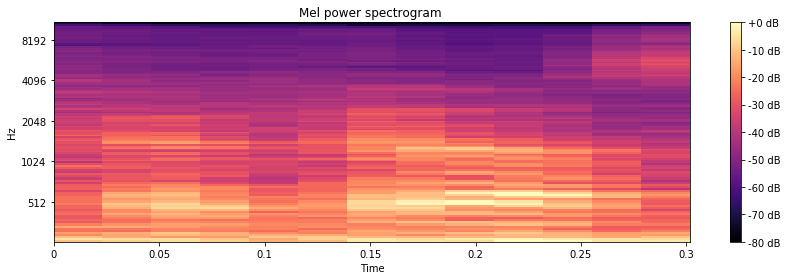

In [41]:
# From this tutorial
# https://github.com/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb
S = librosa.feature.melspectrogram(samples, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [42]:
log_S.shape

(128, 13)

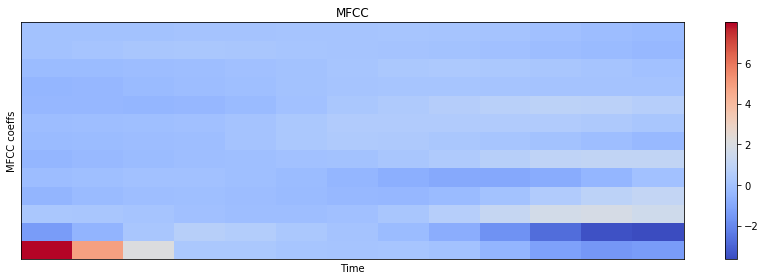

In [43]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

### 3d

In [44]:
data = [go.Surface(z=spectrogram.T)]
layout = go.Layout(
    title='Specgtrogram in 3d',
    scene = dict(
    yaxis = dict(title='Frequencies', range=freqs),
    xaxis = dict(title='Time', range=times),
    zaxis = dict(title='Log amplitude'),
    ),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## FFT

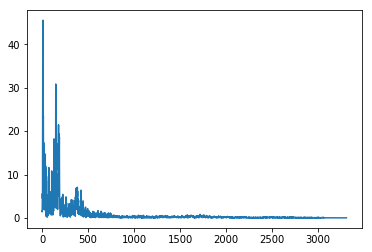

In [45]:
plt.plot(np.abs(fft(samples))[:len(samples)//2])

In [46]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])  # FFT is simmetrical, so we take just the first half
    # FFT is also complex, to we take just the real part (abs)
    return xf, vals

In [47]:
Audio(samples, rate=sample_rate)

In [48]:
Audio(samples_r, rate=new_sample_rate)

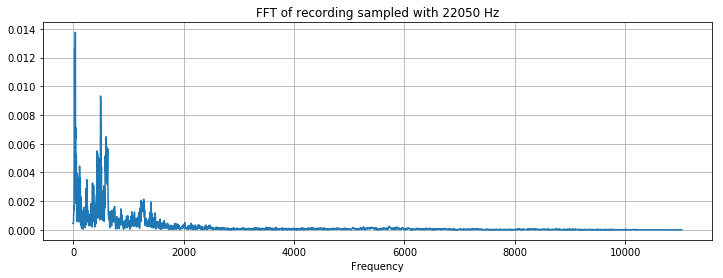

In [49]:
xf, vals = custom_fft(samples, sample_rate)
plt.figure(figsize=(12, 4))
plt.title('FFT of recording sampled with ' + str(sample_rate) + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

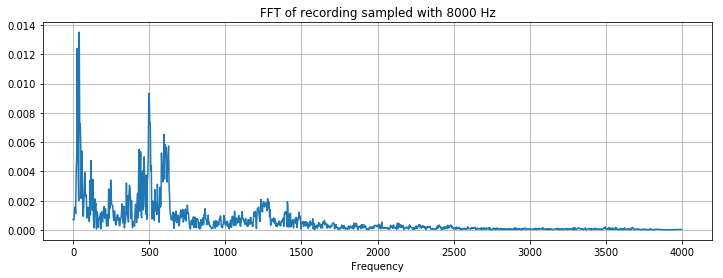

In [50]:
xf, vals = custom_fft(samples_r, new_sample_rate)
plt.figure(figsize=(12, 4))
plt.title('FFT of recording sampled with ' + str(new_sample_rate) + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

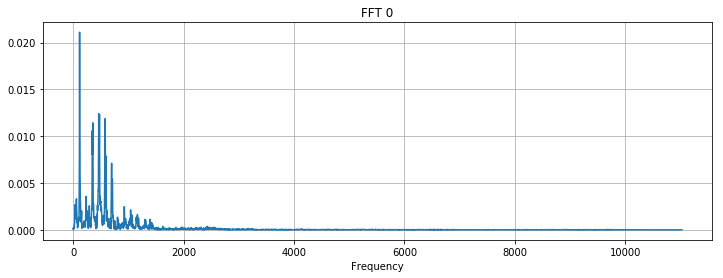

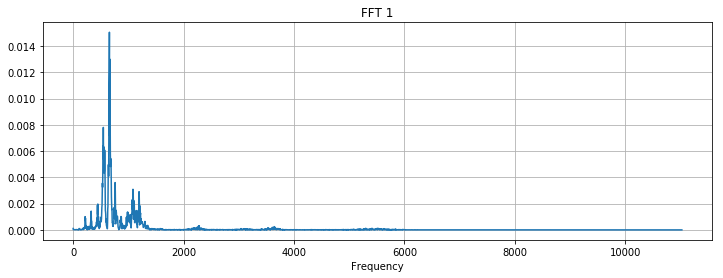

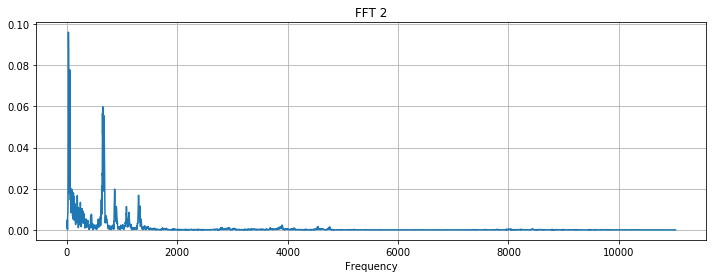

In [51]:
for i, aa in enumerate(a[:3]):
    xf, vals = custom_fft(aa, sample_rate)
    plt.figure(figsize=(12, 4))
    plt.title('FFT {}'.format(i))
    plt.plot(xf, vals)
    plt.xlabel('Frequency')
    plt.grid()
    plt.show()

In [52]:
Audio(a[0], rate=sample_rate)

In [53]:
Audio(a[1], rate=sample_rate)

In [54]:
Audio(a[2], rate=sample_rate)

## Mean FFT and spectrogram

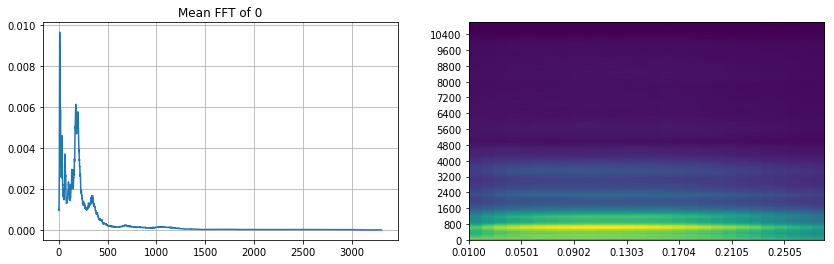

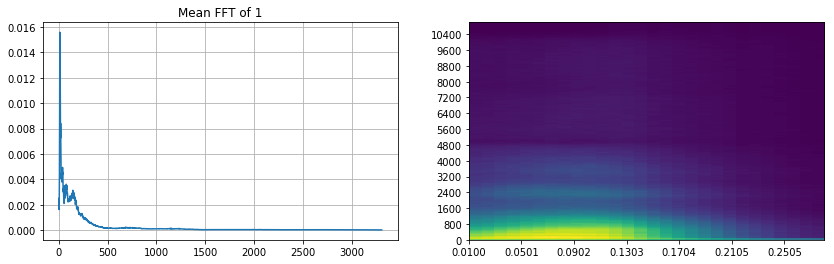

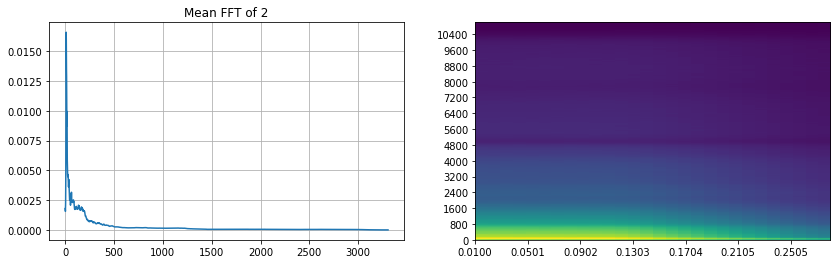

In [55]:
for i, samples in enumerate([a, b, c]):
    vals_all = []
    spec_all = []
    
    for sample in samples:
        xs, vals = custom_fft(sample, sample_rate)
        vals_all.append(vals)
        
        freqs, times, spec = log_specgram(sample, sample_rate)
        spec_all.append(spec)
    
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.title('Mean FFT of {}'.format(i))
    plt.plot(np.mean(np.array(vals_all), axis=0))
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.imshow(np.mean(np.array(spec_all), axis=0).T, aspect='auto', origin='lower',
               extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    plt.yticks(freqs[::16])
    plt.xticks(times[::4])
    plt.show()

## Frequency components across the words

In [56]:
def violinplot_frequency(freq_ind):
    spec_all = []
    
    for i, samples in enumerate([a, b, c]):
        spec_all.append([])
        for sample in samples[:100]:
            freq, time, spec = log_specgram(sample, sample_rate)
            spec_all[i].extend(spec[:, freq_ind])
    mininum = min([len(l) for l in spec_all])
    spec_all = np.array([spec[:mininum] for spec in spec_all])
    
    plt.figure(figsize=(13, 7))
    plt.title('Frequency {} Hz'.format(freqs[freq_ind]))
    plt.ylabel('Amount of frequency in a label')
    plt.xlabel('Labels')
    sns.violinplot(data=pd.DataFrame(spec_all.T, columns=['a', 'b', 'c']))
    plt.show()

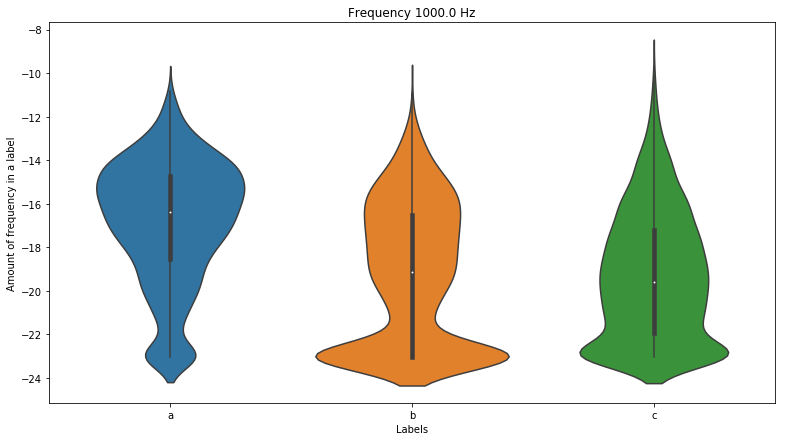

In [57]:
violinplot_frequency(20)

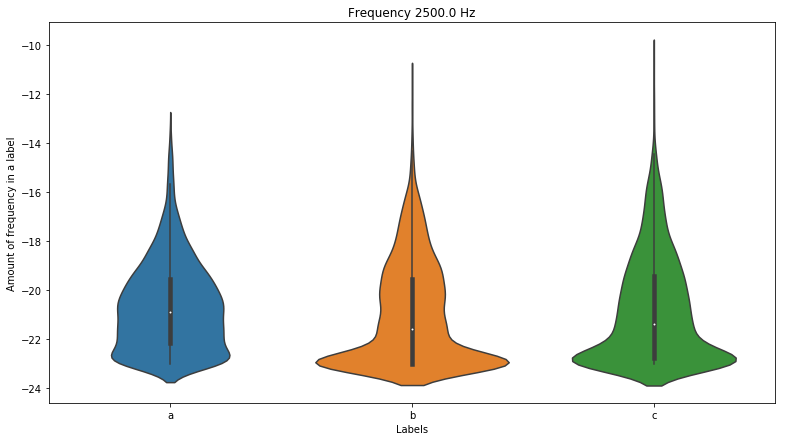

In [58]:
violinplot_frequency(50)

## Anomaly detection

In [59]:
from sklearn.decomposition import PCA

In [60]:
fft_all = []
names = []

for i, samples in enumerate([a, b, c]):
    for j, sample in enumerate(samples[:250]):
        xs, ys = custom_fft(sample, sample_rate)
        fft_all.append(ys)
        names.append('{}_{}'.format(i, j))

In [61]:
fft_all = np.array(fft_all)

In [62]:
fft_all = (fft_all - np.mean(fft_all, 0)) / np.std(fft_all, 0)

In [63]:
pca = PCA(3)
fft_all = pca.fit_transform(fft_all)

In [64]:
def interactive_3d_plot(data, names):
    scatt = go.Scatter3d(x=data[:, 0], y=data[:, 1], z=data[:, 2], mode='markers',
                         text=names)
    data = go.Data([scatt])
    layout = go.Layout(title='Anomaly detection')
    figure = go.Figure(data=data, layout=layout)
    py.iplot(figure)

In [66]:
interactive_3d_plot(fft_all[:100], names[:100])